# Representing data in a computer

The core of data science and machine learning is **data**: we are interested in extracting knowledge from data. 

But how exactly do computers represent data? Let's find out exactly what an "artificial intelligence" has at its disposal to learn from.

## Data is represented as arrays

Let's take a look at some fruit. Using the `Images.jl` library, we can load in some images:

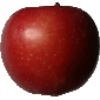

In [14]:
using Images

apple = load("data/10_100.jpg")

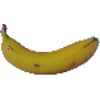

In [15]:
banana = load("data/104_100.jpg")

Here we have images of apples and bananas. We would eventually like to build a program that can automatically distinguish between the two. However, the computer doesn't "see" an apple or a banana; instead, it just sees numbers. 

An image is encoded in something called an **array**, which is like a container that has boxes or slots for individual pieces of data:

![attachment:array_cartoon.png](data/array_cartoon.png)

An array is a bunch of numbers in connected boxes; the figure above shows a 1-dimensional array. Our images are instead 2-dimensional arrays, or matrices, of numbers, arranged something like this:

![attachment:array2d.png](data/array_2d.png)

For example, `apple` is an image, consisting of a 100x100 array of numbers:

In [16]:
size(apple)

(100, 100)

We can grab the datum stored in the box at row `i` and column `j` by *indexing* using square brackets: `[i, j]`. For example, let's get the pixel (piece of the image) in box $(40, 60)$, i.e. in the 40th row and 60th column of the image:

In [17]:
apple[40, 60]

In [18]:
apple[90, 60]

In [19]:
show(apple[90, 60])

RGB4{N0f8}(0.176,0.02,0.02)

In [20]:
dump(apple[90, 60])

ColorTypes.RGB4{FixedPointNumbers.Normed{UInt8,8}}
  r: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 45
  g: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 5
  b: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 5
  alphadummy: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 255


In [21]:
45 / 255

0.17647058823529413

Julia has good "introspection" capabilities.

We see that Julia displays a coloured box! Julia, via the `Colors.jl` package, is clever enough to display colours in a way that is useful to us humans!

So, in fact, an image is a 2D array, in which each element of the array is an object (a collection of numbers) describing a coloured pixel.

## Colors as numbers

How, then, are these colors actually stored? Computers store colors in RGB format, that is they store a value between 0 and 1 for each of three "channels": red, green, and blue. Here, 0 means none of that color and 1 means the brightest form of that color. The overall color is a combination of those three colors. 

For example, we can pull out the `red` value using the function `red` applied to the color. Since internally the actual value is stored in a special format, we choose to convert it to a standard floating-point number using the `Float64` function:

In [22]:
red(apple[40, 60])

0.522N0f8

In [23]:
Float64(red(apple[40, 60]))

0.5215686274509804

In [25]:
pixel = apple[40, 60]

red_value   = Float64( red(pixel) )
green_value = Float64( green(pixel) )
blue_value  = Float64( blue(pixel) )

print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.5215686274509804, 0.09803921568627451, 0.058823529411764705)

Since the red value is high while the others are low, this means that at pixel `(40, 60)`, the picture of the apple is very red. If we do the same at one of the corners of the picture, we get the following:

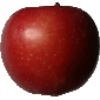

In [26]:
apple

In [27]:
pixel = apple[1, 1]

red_value   = Float64( red(pixel) )
green_value = Float64( green(pixel) )
blue_value  = Float64( blue(pixel) )

print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.996078431372549, 1.0, 0.984313725490196)

We see that every color is bright, which corresponds to white.

## Working on an image as a whole

In Julia, to apply a function to the whole of an array, we place a `.` between the function name and the left parenthesis (`(`), so the following gives us the `red` value of every pixel in the image:

In [28]:
red.(apple)

100×100 Array{N0f8,2}:
 0.996N0f8  1.0N0f8    1.0N0f8    …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.984N0f8  0.996N0f8  1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.98N0f8   0.984N0f8  0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.969N0f8  0.98N0f8   0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.969N0f8  0.98N0f8   1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.98N0f8   0.984N0f8  1.0N0f8    …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.992N0f8  1.0N0f8    0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.996N0f8  1.0N0f8    1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.996N0f8  1.0N0f8    1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    1.0N0f8    …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    0.992N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    0.992N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 ⋮                                ⋱      

In [29]:
Float64.(red.(apple))

100×100 Array{Float64,2}:
 0.996078  1.0       1.0       1.0       …  1.0       1.0  1.0  1.0  1.0
 0.984314  0.996078  1.0       1.0          1.0       1.0  1.0  1.0  1.0
 0.980392  0.984314  0.996078  1.0          1.0       1.0  1.0  1.0  1.0
 0.968627  0.980392  0.996078  1.0          0.996078  1.0  1.0  1.0  1.0
 0.968627  0.980392  1.0       1.0          0.988235  1.0  1.0  1.0  1.0
 0.980392  0.984314  1.0       1.0       …  0.996078  1.0  1.0  1.0  1.0
 0.992157  1.0       0.996078  1.0          1.0       1.0  1.0  1.0  1.0
 0.996078  1.0       1.0       0.996078     1.0       1.0  1.0  1.0  1.0
 0.996078  1.0       1.0       0.996078     1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.992157     1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.992157  …  1.0       1.0  1.0  1.0  1.0
 1.0       1.0       0.992157  0.992157     0.988235  1.0  1.0  1.0  1.0
 1.0       1.0       0.992157  0.992157     0.996078  1.0  1.0  1.0  1.0
 ⋮                       

Note that we get a 2D array (matrix) back.

Julia's [mathematical standard library](https://docs.julialang.org/en/stable/stdlib/math/#Mathematics-1) has many mathematical functions built in. One of them is the `mean` function, which computes the average value. If we apply this to our apple:

In [31]:
mean(Float64.(red.(apple)))

0.5700988235294118

we see that the value indicates that the average amount of red in the image is a value between the amount of red in the apple and the amount of red in the white background. 

*Somehow we need to teach a computer to use this information about a picture to recognize that there's an apple there!*

## A quick riddle

Here's a quick riddle. Let's check the average value of red in the image of the banana.

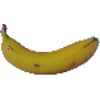

In [34]:
banana

In [32]:
mean(Float64.(red.(banana)))

0.9040309803921569

Oh no, that's more red than our apple? This isn't a mistake and is actually true! Before you move onto the next exercise, examine the images of the apple and the banana very carefully and see if you can explain why this is expected.

#### Exercise 1

What is the average value of blue in the banana?

#### Exercise 2

Does the banana have more blue or more green?

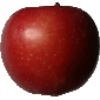

In [35]:
apple

In [36]:
typeof(apple)

Array{ColorTypes.RGB4{FixedPointNumbers.Normed{UInt8,8}},2}

In [38]:
using Images

In [41]:
ch = channelview(apple)

3×100×100 ChannelView(::Array{RGB4{N0f8},2}) with element type FixedPointNumbers.Normed{UInt8,8}:
[:, :, 1] =
 0.996N0f8  0.984N0f8  0.98N0f8   …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.984N0f8  0.98N0f8   0.988N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8

[:, :, 2] =
 1.0N0f8    0.996N0f8  0.984N0f8  …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8    1.0N0f8    1.0N0f8       1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.992N0f8  0.992N0f8  0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8

[:, :, 3] =
 1.0N0f8    1.0N0f8    0.996N0f8  …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.992N0f8  0.992N0f8  0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 0.988N0f8  0.996N0f8  0.996N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8

...

[:, :, 98] =
 1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8  …  1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8     1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8
 1.0N0f8  1.0N0f8  1.0N0f8  1.0N0f8     1.0N0f8

In [48]:
ch[1, 1, 1] = 0
ch[2, 1, 1] = 0
ch[3, 1, 1] = 0

0

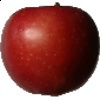

In [49]:
apple